<a href="https://colab.research.google.com/github/Priyanka-Keshav/Heart-Disease-Prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
data.shape

(297, 14)

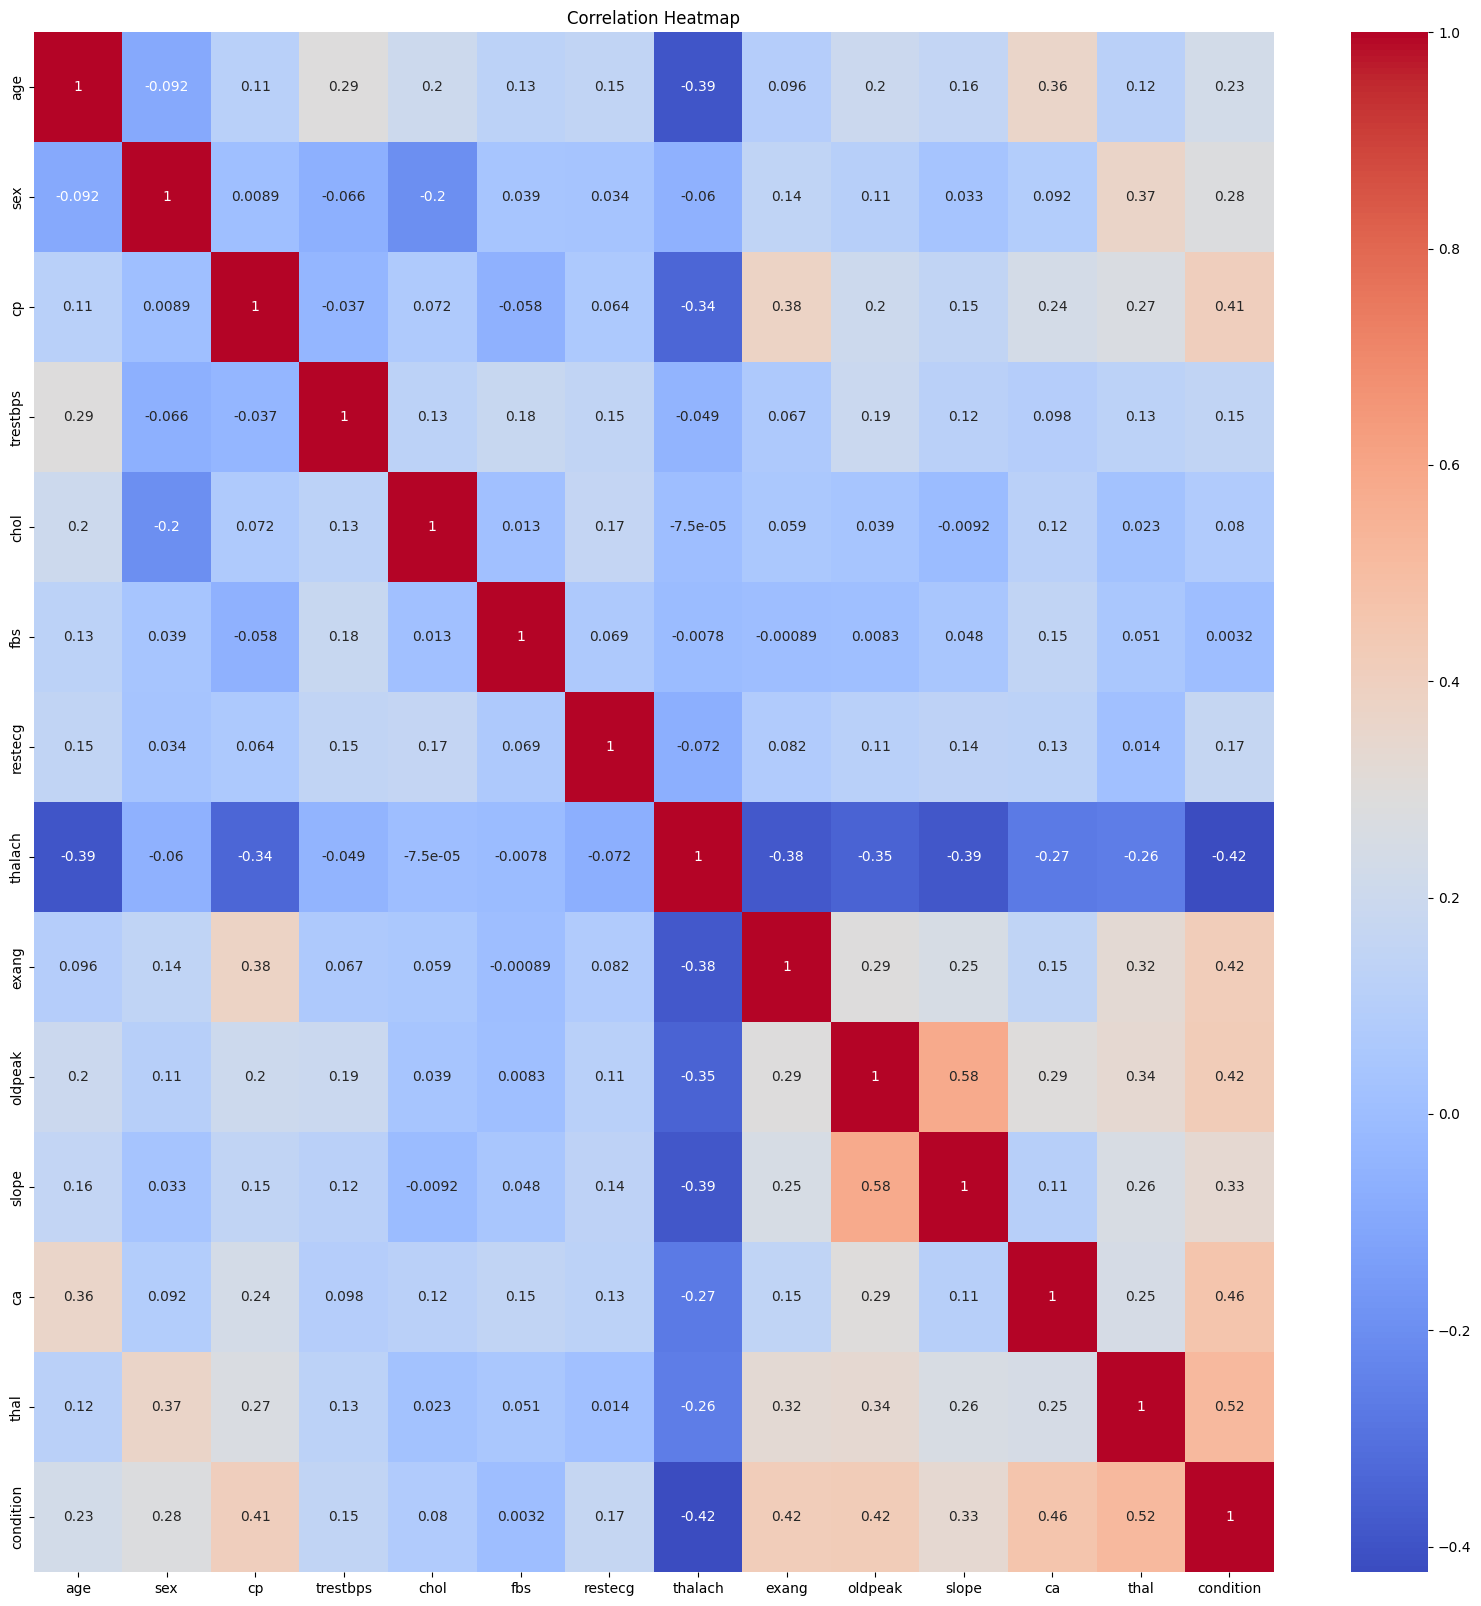

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

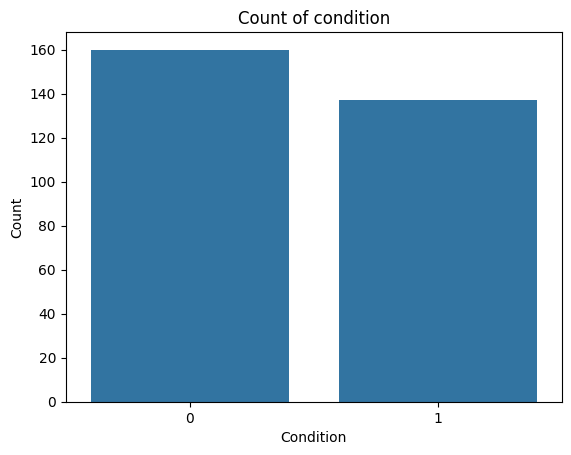

In [ ]:
sns.countplot(x='condition',data=data)
plt.title('Count of condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

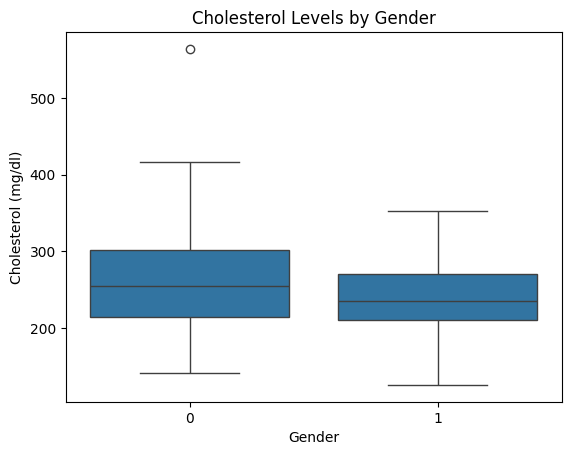

In [ ]:
sns.boxplot(x='sex', y='chol', data=data)
plt.title('Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

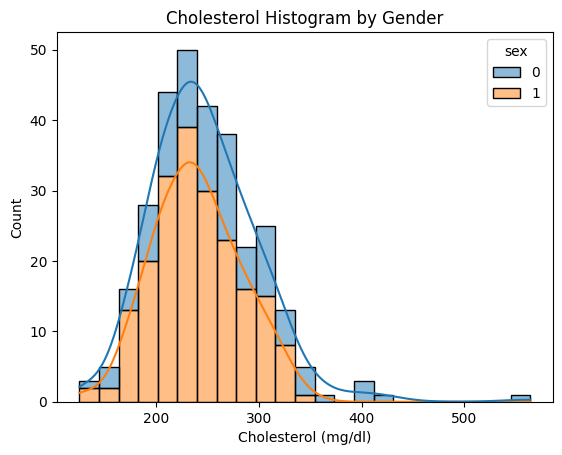

In [ ]:
sns.histplot(data=data, x='chol', hue='sex', kde=True, multiple='stack')
plt.title('Cholesterol Histogram by Gender')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.show()

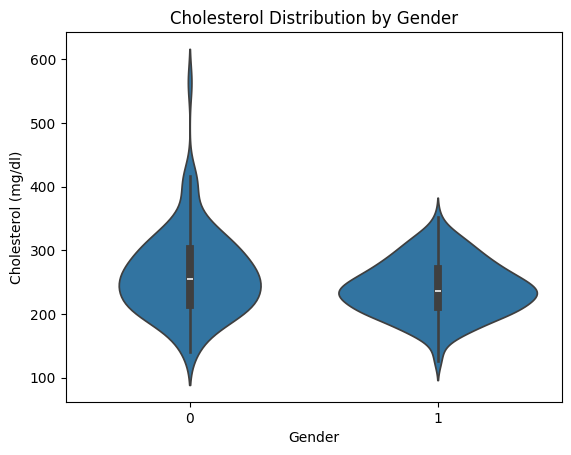

In [ ]:
sns.violinplot(x='sex', y='chol', data=data)
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()


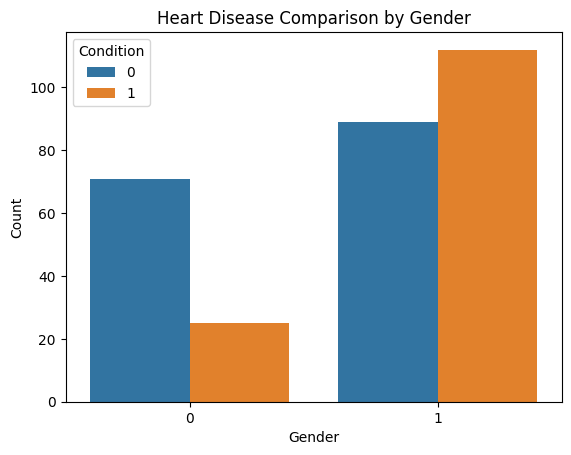

In [ ]:
sns.countplot(x='sex',hue='condition',data=data)
plt.title('Heart Disease Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
X=data.drop(['condition'],axis=1)
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr=LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

svm=SVC(C=1.0, kernel='rbf', gamma='scale')

xgb=XGBClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
tree=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3,5,7,9]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
stand=StandardScaler()
grid.fit(X_train, y_train)
print(grid.best_params_)
X_test = stand.fit_transform(X_test)
X_train=stand.fit_transform(X_train)



{'n_neighbors': 9}


In [ ]:
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
xgb.fit(X_train,y_train)
knn.fit(X_train,y_train)
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_log=lr.predict(X_test)
y_svm=svm.predict(X_test)
y_xgb=xgb.predict(X_test)
y_knn=knn.predict(X_test)
y_tree=tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("logistic regression:\n",accuracy_score(y_test,y_log))
print("svm model:\n",accuracy_score(y_test,y_svm))
print("KNN :\n",accuracy_score(y_test,y_knn))
print("Decision tree:\n",accuracy_score(y_test,y_tree))

logistic regression:
 0.7333333333333333
svm model:
 0.75
KNN :
 0.7
Decision tree:
 0.6666666666666666
